# Análisis SHAP: Random Forest y XGBoost, las 30 características principales - Clasificación binaria

## 1. Clasificación binaria SHAP Random Forest y XGBoost sesión 01 

 Extraemos individualmente los SHAP para cada participante para las 30 características principales de RF y XGB, creando dos gráficos (resumen y barra) y guardándolos en carpetas separadas.

### 1.1 Análisis SHAP individual RF y XGB: 30 características principales, sesión binaria 01

In [56]:
import os
import joblib
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PARTICIPANTS = range(1, 23)

# === RUTAS ===
DATA_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/ML/Binary_clean/sesion01_30"
SPLITS_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/ML/Sepparation/Binary/top30"

RF_DIR  = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/Outputs/Sesion01/rf_binary_sesion01_top30"
XGB_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/Outputs/Sesion01/xgb_binary_sesion01_top30"

# === DONDE GUARDAR SHAP ===
SAVE_BASE = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/SHAP_models/Binary/TOP30/sesion01"
SAVE_RF  = os.path.join(SAVE_BASE, "rf")
SAVE_XGB = os.path.join(SAVE_BASE, "xgb")

os.makedirs(SAVE_RF, exist_ok=True)
os.makedirs(SAVE_XGB, exist_ok=True)

EXCLUDE_COLS = {
    "epoch", "window", "start_w", "end_w", "n_samples", "trust", "binary_trust",
    "tertiles_trust", "eeg_trust", "ecg_trust", "eyetracking_trust", "ring_trust"
}

for PID in PARTICIPANTS:
    print(f"\n=== PARTICIPANT {PID} ===")

    # Buscar CSV del participante
    files = [f for f in os.listdir(DATA_DIR)
             if f.endswith(".csv") and (f"_{PID}_" in f or f"_{PID}." in f or f"{PID}_")]

    if not files:
        print(f"No CSV found for participant {PID}")
        continue

    csv_path = os.path.join(DATA_DIR, sorted(files)[0])
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.lower()

    # Cargar split
    split_path = os.path.join(SPLITS_DIR, f"{PID}_split.npz")
    if not os.path.exists(split_path):
        print(f"No split found for participant {PID}")
        continue

    test_epochs = np.load(split_path, allow_pickle=True)["test_groups"]
    df_test = df[df["epoch"].isin(test_epochs)]

    if df_test.empty:
        print(f"Empty test set for participant {PID}")
        continue

    # Construir Xte
    features = [c for c in df.columns if c not in EXCLUDE_COLS and df[c].dtype.kind in "if"]
    Xte = df_test[features].to_numpy(np.float32)

    if Xte.shape[0] == 0:
        print(f"Xte empty for participant {PID}")
        continue

    for model_type, folder, save_folder in [
        ("RF", RF_DIR, SAVE_RF),
        ("XGB", XGB_DIR, SAVE_XGB)
    ]:
        model_path = os.path.join(folder, f"{model_type.lower()}_clean_for_shap_participant_{PID}.pkl")
        if not os.path.exists(model_path):
            print(f"{model_type} model not found for participant {PID}")
            continue

        print(f"Processing {model_type} for participant {PID}")
        model = joblib.load(model_path)

        # SHAP computation
        explainer = shap.TreeExplainer(model)
        shap_output = explainer(Xte)
        shap_vals = shap_output.values

        if isinstance(shap_vals, list):
            shap_vals = shap_vals[1]

        if shap_vals.ndim == 3:
            shap_vals = shap_vals[:, :, 1]

        # Guardar importancias SHAP
        shap_mean_abs = np.mean(np.abs(shap_vals), axis=0)
        df_ind = pd.DataFrame({
            "feature": features,
            "mean_importance": shap_mean_abs
        }).sort_values("mean_importance", ascending=False)

        df_ind.to_csv(
            os.path.join(save_folder, f"SHAP_INDIVIDUAL_{model_type}_P{PID}.csv"),
            index=False
        )

        # Figuras SHAP
        plt.figure()
        shap.summary_plot(shap_vals, Xte, feature_names=features, show=False)
        plt.savefig(os.path.join(save_folder, f"shap_summary_{model_type}_P{PID}.png"),
                    dpi=300, bbox_inches="tight")
        plt.close()

        plt.figure()
        shap.summary_plot(shap_vals, Xte, feature_names=features, plot_type="bar", show=False)
        plt.savefig(os.path.join(save_folder, f"shap_bar_{model_type}_P{PID}.png"),
                    dpi=300, bbox_inches="tight")
        plt.close()



=== PARTICIPANT 1 ===
No split found for participant 1

=== PARTICIPANT 2 ===
No split found for participant 2

=== PARTICIPANT 3 ===
Processing RF for participant 3
Processing XGB for participant 3

=== PARTICIPANT 4 ===
Processing RF for participant 4
Processing XGB for participant 4

=== PARTICIPANT 5 ===
Processing RF for participant 5
Processing XGB for participant 5

=== PARTICIPANT 6 ===
Processing RF for participant 6
Processing XGB for participant 6

=== PARTICIPANT 7 ===
Processing RF for participant 7
Processing XGB for participant 7

=== PARTICIPANT 8 ===
Processing RF for participant 8
Processing XGB for participant 8

=== PARTICIPANT 9 ===
Processing RF for participant 9
Processing XGB for participant 9

=== PARTICIPANT 10 ===
Processing RF for participant 10
Processing XGB for participant 10

=== PARTICIPANT 11 ===
No split found for participant 11

=== PARTICIPANT 12 ===
Processing RF for participant 12
Processing XGB for participant 12

=== PARTICIPANT 13 ===
No split

In [57]:
import os
import pandas as pd

BASE_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/SHAP_models/Binary/TOP30/sesion01/rf"

PARTICIPANTS = range(1, 23)

for PID in PARTICIPANTS:
    csv_path = os.path.join(BASE_DIR, f"SHAP_INDIVIDUAL_RF_P{PID}.csv")

    if not os.path.exists(csv_path):
        continue

    df = pd.read_csv(csv_path)
    top20 = df.sort_values("mean_importance", ascending=False).head(20)

    print(f"\n==============================")
    print(f" TOP 20 RF — PARTICIPANT {PID}")
    print(f"==============================")
    print(top20[["feature", "mean_importance"]])



 TOP 20 RF — PARTICIPANT 3
                     feature  mean_importance
0         ch4-lowgamma-hjact         0.015976
1           ch4-lowgamma-std         0.013762
2         ch5-lowgamma-hjact         0.011925
3           ch5-lowgamma-std         0.011371
4           ch4-lowgamma-psd         0.010161
5            ch4-lowgamma-de         0.009002
6         ch5-lowgamma-hjmob         0.008471
7        ch5-lowgamma-hjcomp         0.007987
8    ch4-lowgamma-peaktopeak         0.006275
9          ch15-lowgamma-std         0.005943
10       ch15-lowgamma-hjact         0.004912
11  ch12-lowgamma-peaktopeak         0.004881
12         ch12-lowgamma-std         0.004834
13           ch5-lowgamma-de         0.004662
14          ch5-lowgamma-psd         0.004469
15       ch13-lowgamma-hjact         0.004435
16         ch13-lowgamma-std         0.004005
17       ch12-lowgamma-hjact         0.003919
18   ch5-lowgamma-peaktopeak         0.003912
19          ch6-lowgamma-std         0.003366

 TOP 

In [2]:
import os
import pandas as pd


BASE_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/SHAP_models/Binary/TOP30/sesion01/xgb"

PARTICIPANTS = range(1, 23)

for PID in PARTICIPANTS:
    csv_path = os.path.join(BASE_DIR, f"SHAP_INDIVIDUAL_XGB_P{PID}.csv")

    if not os.path.exists(csv_path):
        continue

    df = pd.read_csv(csv_path)
    top20 = df.sort_values("mean_importance", ascending=False).head(20)

    print(f"\n==============================")
    print(f" TOP 20 XGB — PARTICIPANT {PID}")
    print(f"==============================")
    print(top20[["feature", "mean_importance"]])



 TOP 20 XGB — PARTICIPANT 3
                     feature  mean_importance
0         ch4-lowgamma-hjact         0.369149
1         ch5-lowgamma-hjact         0.289242
2        ch13-lowgamma-hjact         0.234010
3            ch5-sigma-hjmob         0.203184
4        ch15-lowgamma-hjact         0.188627
5    ch6-lowgamma-peaktopeak         0.169369
6           ch2-lowgamma-psd         0.167559
7            ch2-alpha-hjmob         0.149182
8   ch18-lowgamma-peaktopeak         0.143949
9               ch1-beta-psd         0.141883
10       ch5-lowgamma-hjcomp         0.140640
11          ch9-lowgamma-psd         0.133237
12        ch1-lowgamma-hjact         0.132820
13          ch4-delta-relpow         0.117420
14        ch5-lowgamma-hjmob         0.105051
15        ch7-lowgamma-hjact         0.103540
16        ch14-lowgamma-kurt         0.097939
17  ch12-lowgamma-peaktopeak         0.094667
18            ch14-alpha-psd         0.093855
19      ch13-beta-peaktopeak         0.087804

 TOP

### 1.2 Análisis SHAP global RF y XGB: 30 características principales, sesión binaria 01

Comenzamos realizando un análisis exhaustivo de los valores SHAP obtenidos para las 30 características principales de RF y XGB, extrayendo un archivo CSV con la importancia SHAP media por característica entre todos los participantes.

In [59]:
# SHAP GLOBAL (sesion01) – versión segura estilo PRUEBA
import os
import joblib
import shap
import numpy as np
import pandas as pd

PARTICIPANTS = range(1, 23)

DATA_DIR   = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/ML/Binary_clean/sesion01_30"
SPLITS_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/ML/Sepparation/Binary/top30"

RF_DIR  = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/Outputs/Sesion01/rf_binary_sesion01_top30"
XGB_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/Outputs/Sesion01/xgb_binary_sesion01_top30"

SAVE_BASE = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/SHAP_models/Binary/TOP30/sesion01"
os.makedirs(SAVE_BASE, exist_ok=True)

EXCLUDE_COLS = {
    "epoch", "window", "start_w", "end_w", "n_samples",
    "trust", "binary_trust", "tertiles_trust",
    "eeg_trust", "ecg_trust", "eyetracking_trust", "ring_trust"
}

all_shap_RF  = {}
all_shap_XGB = {}
features_global = None  # se fija la primera vez y se verifica después


def find_participant_csv(data_dir: str, pid: int) -> str | None:
    files = [
        f for f in os.listdir(data_dir)
        if f.endswith(".csv") and (f"_{pid}_" in f or f"_{pid}." in f or f"{pid}_")
    ]
    return os.path.join(data_dir, files[0]) if files else None


def coerce_shap_to_2d(shap_values: np.ndarray | list) -> np.ndarray:
  
    # Caso 1: lista por clase
    if isinstance(shap_values, list):
        # en binario suele ser [clase0, clase1]; usamos clase1
        shap_values = shap_values[1]

    shap_values = np.asarray(shap_values)

    # Caso 2: tensor (n, features, 2) -> clase 1
    if shap_values.ndim == 3 and shap_values.shape[-1] == 2:
        shap_values = shap_values[:, :, 1]

    # Caso 3: ya es (n, features)
    if shap_values.ndim != 2:
        raise ValueError(f"Unexpected SHAP shape: {shap_values.shape}")

    return shap_values


for PID in PARTICIPANTS:
    print(f"\n=============== PARTICIPANT {PID} ===============")

    csv_path = find_participant_csv(DATA_DIR, PID)
    if csv_path is None:
        print("  → No CSV, skipping")
        continue

    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.lower()

    split_path = os.path.join(SPLITS_DIR, f"{PID}_split.npz")
    if not os.path.exists(split_path):
        print("  → No split file, skipping")
        continue

    test_epochs = np.load(split_path, allow_pickle=True)["test_groups"]
    df_test = df[df["epoch"].isin(test_epochs)]
    if df_test.empty:
        print("  → Empty test set, skipping")
        continue

    # lista base de features numéricas (fallback)
    base_features = [
        c for c in df.columns
        if c not in EXCLUDE_COLS and df[c].dtype.kind in "if"
    ]

    for model_type, folder, storage_dict in [
        ("RF",  RF_DIR,  all_shap_RF),
        ("XGB", XGB_DIR, all_shap_XGB)
    ]:
        model_path = os.path.join(folder, f"{model_type.lower()}_global_clean_for_shap_participant_{PID}.pkl")
        if not os.path.exists(model_path):
            print(f"  → No model {model_type}, skipping")
            continue

        print(f"  → Load {model_type}")
        model = joblib.load(model_path)

        # === ALINEAR Xte CON EL ORDEN DEL MODELO (CRÍTICO) ===
        if hasattr(model, "feature_names_in_"):
            feats_model = list(model.feature_names_in_)

            missing = [f for f in feats_model if f not in df_test.columns]
            if missing:
                raise ValueError(
                    f"{model_type} P{PID}: Missing {len(missing)} features in CSV (e.g., {missing[:5]})."
                )

            Xte = df_test[feats_model].to_numpy(np.float32)

            if features_global is None:
                features_global = feats_model
            else:
                # seguridad: que el orden sea idéntico en todos los participantes/modelos
                if feats_model != features_global:
                    raise ValueError(
                        f"Feature order mismatch in {model_type} for participant {PID}."
                    )
        else:
            # fallback si el modelo no tiene feature_names_in_
            if not base_features:
                raise ValueError(f"P{PID}: No numeric features available after exclusions.")
            Xte = df_test[base_features].to_numpy(np.float32)

            if features_global is None:
                features_global = base_features
            else:
                if base_features != features_global:
                    raise ValueError(f"Base feature order mismatch for participant {PID}.")

        if Xte.shape[0] == 0:
            print("  → Xte empty, skipping")
            continue

        # === SHAP ===
        explainer = shap.TreeExplainer(model)
        shap_out = explainer(Xte)
        shap_values = coerce_shap_to_2d(shap_out.values)

        shap_mean_abs = np.mean(np.abs(shap_values), axis=0)
        print(f"  P{PID} – {model_type}: {shap_mean_abs.shape[0]} features")

        # Guardar por participante
        storage_dict[PID] = shap_mean_abs


# === GUARDAR CSVs ===
for model_type, shap_dict in [("RF", all_shap_RF), ("XGB", all_shap_XGB)]:
    if not shap_dict:
        print(f"\nNo data for {model_type}, skipping CSV")
        continue
    if features_global is None:
        raise ValueError("features_global is None: no features were set.")

    df_out = pd.DataFrame(shap_dict, index=features_global)

    # media entre participantes (peso igual)
    df_out["mean_importance"] = df_out.mean(axis=1)

    # ranking global (denso, entero)
    df_out["rank_global"] = (
        df_out["mean_importance"].rank(method="dense", ascending=False).astype(int)
    )
    df_out = df_out.sort_values("rank_global")

    out_path = os.path.join(SAVE_BASE, f"SHAP_GLOBAL_{model_type}_ALL_PARTICIPANTS.csv")
    df_out.to_csv(out_path)
    print(f"\nCSV guardado: {out_path}")

print("\nEND OF THE SHAP GLOBAL PROCESS\n")



=============== PARTICIPANT 1 ===============
  → No split file, skipping

=============== PARTICIPANT 2 ===============
  → No split file, skipping

=============== PARTICIPANT 3 ===============
  → Load RF
  P3 – RF: 376 features
  → Load XGB
  P3 – XGB: 376 features

=============== PARTICIPANT 4 ===============
  → Load RF
  P4 – RF: 376 features
  → Load XGB
  P4 – XGB: 376 features

=============== PARTICIPANT 5 ===============
  → Load RF
  P5 – RF: 376 features
  → Load XGB
  P5 – XGB: 376 features

=============== PARTICIPANT 6 ===============
  → Load RF
  P6 – RF: 376 features
  → Load XGB
  P6 – XGB: 376 features

=============== PARTICIPANT 7 ===============
  → Load RF
  P7 – RF: 376 features
  → Load XGB
  P7 – XGB: 376 features

=============== PARTICIPANT 8 ===============
  → Load RF
  P8 – RF: 376 features
  → Load XGB
  P8 – XGB: 376 features

=============== PARTICIPANT 9 ===============
  → Load RF
  P9 – RF: 376 features
  → Load XGB
  P9 – XGB: 376 features

==

### 1.3 Resultados RF y XGB: 30 características principales, sesión binaria 01

In [60]:
import pandas as pd

csv_rf  = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/SHAP_models/Binary/TOP30/sesion01/SHAP_GLOBAL_RF_ALL_PARTICIPANTS.csv"
csv_xgb = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/SHAP_models/Binary/TOP30/sesion01/SHAP_GLOBAL_XGB_ALL_PARTICIPANTS.csv"

df_rf  = pd.read_csv(csv_rf, index_col=0).reset_index().rename(columns={"index": "feature"})
df_xgb = pd.read_csv(csv_xgb, index_col=0).reset_index().rename(columns={"index": "feature"})

df_rf_sorted  = df_rf.sort_values(["rank_global", "mean_importance"], ascending=[True, False])
df_xgb_sorted = df_xgb.sort_values(["rank_global", "mean_importance"], ascending=[True, False])

top20_rf  = df_rf_sorted.head(20)
top20_xgb = df_xgb_sorted.head(20)

print("\n=== TOP 20 RF ===")
print(top20_rf[["feature", "mean_importance", "rank_global"]].to_string(index=False))

print("\n=== TOP 20 XGB ===")
print(top20_xgb[["feature", "mean_importance", "rank_global"]].to_string(index=False))



=== TOP 20 RF ===
                 feature  mean_importance  rank_global
      ch8-lowgamma-hjact         0.005226            1
        ch8-lowgamma-std         0.004812            2
     ch18-lowgamma-hjact         0.004143            3
     ch12-lowgamma-hjact         0.004025            4
        ch4-lowgamma-std         0.003950            5
     ch13-lowgamma-hjact         0.003948            6
       ch12-lowgamma-std         0.003941            7
      ch4-lowgamma-hjact         0.003933            8
       ch16-lowgamma-std         0.003866            9
     ch16-lowgamma-hjact         0.003860           10
       ch18-lowgamma-std         0.003847           11
       ch13-lowgamma-std         0.003815           12
     ch17-lowgamma-hjact         0.003812           13
 ch8-lowgamma-peaktopeak         0.003633           14
       ch17-lowgamma-std         0.003572           15
ch12-lowgamma-peaktopeak         0.003548           16
       ch14-lowgamma-std         0.003491     

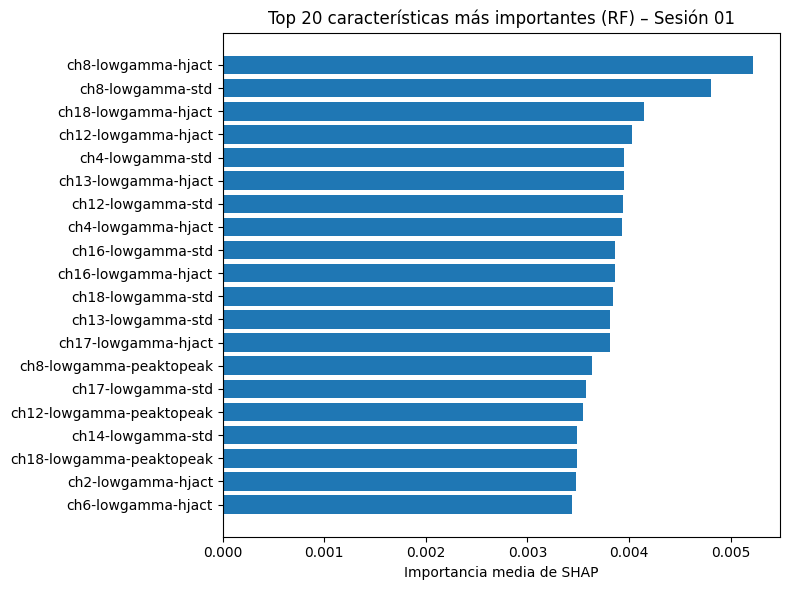

In [61]:
import os
import matplotlib.pyplot as plt

os.makedirs("SHAP_models/Graficas_resultados", exist_ok=True)

plt.figure(figsize=(8, 6))
plt.barh(
    top20_rf["feature"][::-1],
    top20_rf["mean_importance"][::-1]
)
plt.xlabel("Importancia media de SHAP")
plt.title("Top 20 características más importantes (RF) – Sesión 01")
plt.tight_layout()

plt.savefig(
    "SHAP_models/Graficas_resultados/Top20_SHAP_RF_S01.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()


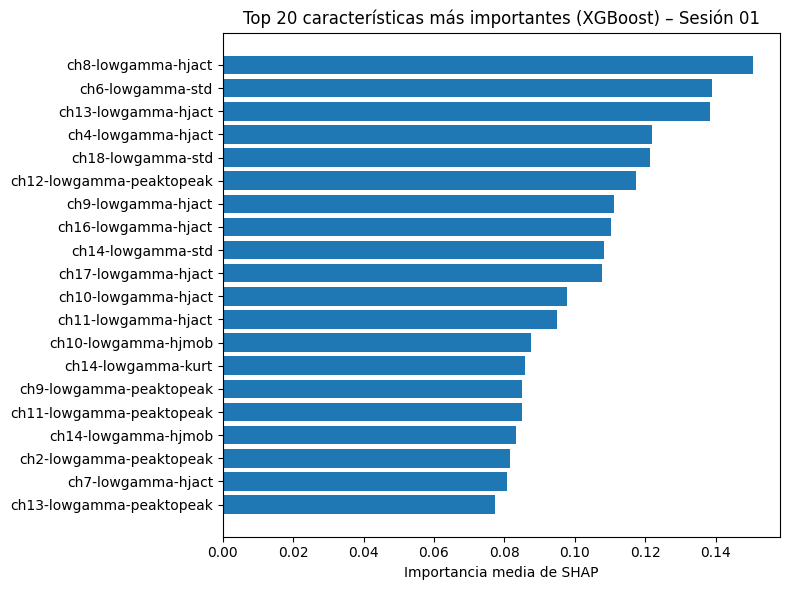

In [62]:
import os
import matplotlib.pyplot as plt

os.makedirs("SHAP_models/Graficas_resultados", exist_ok=True)

plt.figure(figsize=(8, 6))
plt.barh(
    top20_xgb["feature"][::-1],
    top20_xgb["mean_importance"][::-1]
)
plt.xlabel("Importancia media de SHAP")
plt.title("Top 20 características más importantes (XGBoost) – Sesión 01")
plt.tight_layout()

plt.savefig(
    "SHAP_models/Graficas_resultados/Top20_SHAP_XGB_S01.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close()


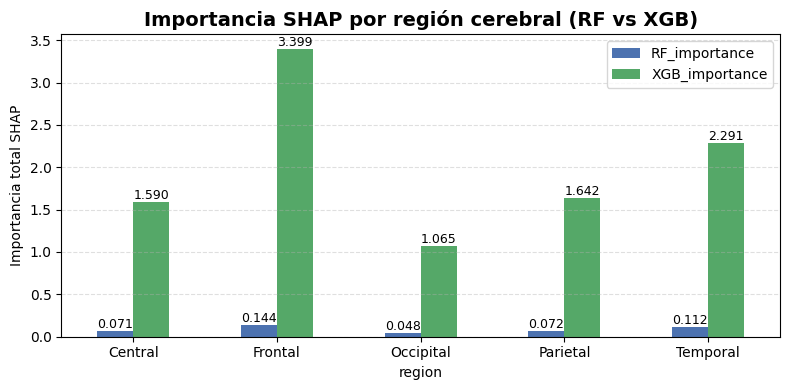

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Cargar CSVs ===
df_rf  = pd.read_csv(csv_rf).rename(columns={"Unnamed: 0": "feature"})
df_xgb = pd.read_csv(csv_xgb).rename(columns={"Unnamed: 0": "feature"})

# === Mapeo canal → región ===
channel_region = {
    "ch1": "Frontal","ch2": "Frontal","ch3": "Frontal","ch4": "Frontal",
    "ch5": "Frontal","ch6": "Frontal","ch7": "Frontal",
    "ch8": "Temporal","ch12": "Temporal","ch13": "Temporal","ch17": "Temporal",
    "ch9": "Central","ch10": "Central","ch11": "Central",
    "ch14": "Parietal","ch15": "Parietal","ch16": "Parietal",
    "ch18": "Occipital","ch19": "Occipital"
    
}

def get_channel(f):
    return f.split("-")[0]

df_rf["region"]  = df_rf["feature"].apply(get_channel).map(channel_region)
df_xgb["region"] = df_xgb["feature"].apply(get_channel).map(channel_region)

# === Agrupar SHAP por región ===
rf_regions = df_rf.groupby("region")["mean_importance"].sum()
xgb_regions = df_xgb.groupby("region")["mean_importance"].sum()

regions_df = pd.DataFrame({
    "RF_importance": rf_regions,
    "XGB_importance": xgb_regions
})

# === FIGURA ===
colors = ["#4C72B0", "#55A868"]
ax = regions_df.plot(kind="bar", figsize=(8,4), color=colors)

plt.title("Importancia SHAP por región cerebral (RF vs XGB)", fontsize=14, fontweight="bold")
plt.ylabel("Importancia total SHAP")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Etiquetas encima de cada barra
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("SHAP_importance_by_region.png", dpi=300)
plt.show()


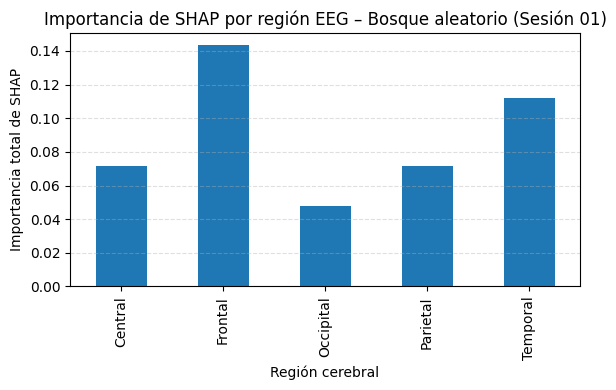

In [64]:
plt.figure(figsize=(6, 4))

rf_regions.plot(
    kind="bar",
    color="tab:blue"
)

plt.title("Importancia de SHAP por región EEG – Bosque aleatorio (Sesión 01)")
plt.ylabel("Importancia total de SHAP")
plt.xlabel("Región cerebral")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()

plt.savefig(
    "SHAP_models/Graficas_resultados/EEG_regiones_SHAP_RF_SO1.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


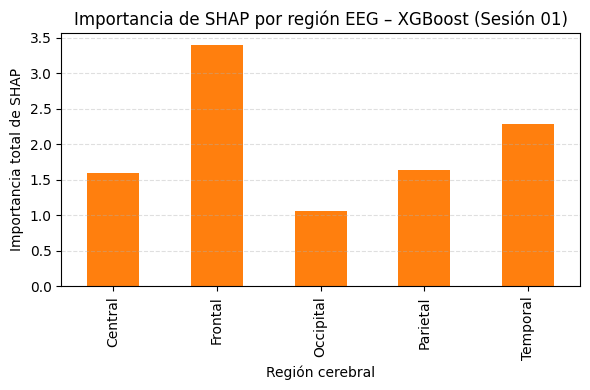

In [65]:
plt.figure(figsize=(6, 4))

xgb_regions.plot(
    kind="bar",
    color="tab:orange"
)

plt.title("Importancia de SHAP por región EEG – XGBoost (Sesión 01)")
plt.ylabel("Importancia total de SHAP")
plt.xlabel("Región cerebral")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()

plt.savefig(
    "SHAP_models/Graficas_resultados/EEG_regiones_SHAP_XGB_SO1.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


## 2. SHAP RF Y XGBOOST TOP 30 BINARIO SESIÓN 02

### 2.1 Análisis SHAP individual RF y XGB: 30 características principales, sesión binaria 02
 Extraemos individualmente los SHAP para cada participante para las 30 características principales de RF y XGB, creando dos gráficos (resumen y barra) y guardándolos en carpetas separadas.

In [66]:
import os
import joblib
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PARTICIPANTS = range(1, 23)

# === RUTAS ===
DATA_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/ML/Binary_clean/sesion02_top30"
SPLITS_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/ML/Sepparation/Binary/top30/sesion02"

RF_DIR  = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/Outputs/Sesion02/rf_binary_sesion02_top30"
XGB_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/Outputs/Sesion02/xgb_binary_sesion02_top30"

SAVE_BASE = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/SHAP_models/Binary/TOP30/sesion02"
SAVE_RF  = os.path.join(SAVE_BASE, "rf")
SAVE_XGB = os.path.join(SAVE_BASE, "xgb")

os.makedirs(SAVE_RF, exist_ok=True)
os.makedirs(SAVE_XGB, exist_ok=True)

EXCLUDE_COLS = {
    "epoch","window","start_w","end_w","n_samples","trust","binary_trust",
    "tertiles_trust","eeg_trust","ecg_trust","eyetracking_trust","ring_trust"
}

for PID in PARTICIPANTS:
    print(f"\n=== PARTICIPANT {PID} ===")

    # Buscar CSV del participante
    files = [f for f in os.listdir(DATA_DIR)
             if f.endswith(".csv") and (f"_{PID}_" in f or f"_{PID}." in f or f"{PID}_")]

    if not files:
        print(f"No CSV for participant {PID}")
        continue

    csv_path = os.path.join(DATA_DIR, sorted(files)[0])
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.lower()

    split_path = os.path.join(SPLITS_DIR, f"{PID}_split.npz")
    if not os.path.exists(split_path):
        print(f"No split for participant {PID}")
        continue

    test_epochs = np.load(split_path, allow_pickle=True)["test_groups"]
    df_test = df[df["epoch"].isin(test_epochs)]
    if df_test.empty:
        print(f"Empty test set for participant {PID}")
        continue

    features = [c for c in df.columns if c not in EXCLUDE_COLS and df[c].dtype.kind in "if"]
    Xte = df_test[features].to_numpy(np.float32)

    if Xte.shape[0] == 0:
        print(f"Xte empty for participant {PID}")
        continue

    for model_type, folder, save_folder in [
        ("RF", RF_DIR, SAVE_RF),
        ("XGB", XGB_DIR, SAVE_XGB)
    ]:
        model_path = os.path.join(folder, f"{model_type.lower()}_clean_for_shap_participant_{PID}.pkl")
        if not os.path.exists(model_path):
            print(f"{model_type} model not found for participant {PID}")
            continue

        model = joblib.load(model_path)

        explainer = shap.TreeExplainer(model)
        shap_output = explainer(Xte)
        shap_vals = shap_output.values

        # SHAP puede devolver lista por clases en algunos casos
        if isinstance(shap_vals, list):
            shap_vals = shap_vals[1]

        # Salida 3D típica en binario (n, features, 2)
        if shap_vals.ndim == 3:
            shap_vals = shap_vals[:, :, 1]

        shap_mean_abs = np.mean(np.abs(shap_vals), axis=0)
        df_ind = pd.DataFrame({
            "feature": features,
            "mean_importance": shap_mean_abs
        }).sort_values("mean_importance", ascending=False)

        df_ind.to_csv(
            os.path.join(save_folder, f"SHAP_INDIVIDUAL_{model_type}_P{PID}.csv"),
            index=False
        )

        plt.figure()
        shap.summary_plot(shap_vals, Xte, feature_names=features, show=False)
        plt.savefig(
            os.path.join(save_folder, f"shap_summary_{model_type}_P{PID}.png"),
            dpi=300, bbox_inches="tight"
        )
        plt.close()

        plt.figure()
        shap.summary_plot(shap_vals, Xte, feature_names=features, plot_type="bar", show=False)
        plt.savefig(
            os.path.join(save_folder, f"shap_bar_{model_type}_P{PID}.png"),
            dpi=300, bbox_inches="tight"
        )
        plt.close()



=== PARTICIPANT 1 ===
No split for participant 1

=== PARTICIPANT 2 ===
No split for participant 2

=== PARTICIPANT 3 ===

=== PARTICIPANT 4 ===
No split for participant 4

=== PARTICIPANT 5 ===

=== PARTICIPANT 6 ===

=== PARTICIPANT 7 ===
No split for participant 7

=== PARTICIPANT 8 ===

=== PARTICIPANT 9 ===

=== PARTICIPANT 10 ===

=== PARTICIPANT 11 ===
No split for participant 11

=== PARTICIPANT 12 ===

=== PARTICIPANT 13 ===
No split for participant 13

=== PARTICIPANT 14 ===

=== PARTICIPANT 15 ===

=== PARTICIPANT 16 ===
No split for participant 16

=== PARTICIPANT 17 ===
No split for participant 17

=== PARTICIPANT 18 ===
No split for participant 18

=== PARTICIPANT 19 ===
No split for participant 19

=== PARTICIPANT 20 ===
No split for participant 20

=== PARTICIPANT 21 ===

=== PARTICIPANT 22 ===


In [67]:
#CAMBIAR
import os
import pandas as pd


BASE_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/SHAP_models/Binary/TOP30/sesion02/rf"

PARTICIPANTS = range(1, 23)

for PID in PARTICIPANTS:
    csv_path = os.path.join(BASE_DIR, f"SHAP_INDIVIDUAL_RF_P{PID}.csv")

    if not os.path.exists(csv_path):
        continue

    df = pd.read_csv(csv_path)
    top20 = df.sort_values("mean_importance", ascending=False).head(20)

    print(f"\n==============================")
    print(f" TOP 20 RF — PARTICIPANT {PID}")
    print(f"==============================")
    print(top20[["feature", "mean_importance"]])
    




 TOP 20 RF — PARTICIPANT 3
                    feature  mean_importance
0          ch3-lowgamma-psd         0.011057
1          ch3-lowgamma-std         0.008660
2           ch3-lowgamma-de         0.008178
3        ch3-lowgamma-hjact         0.007894
4   ch3-lowgamma-peaktopeak         0.005630
5      ch11-lowgamma-hjcomp         0.004654
6           ch15-alpha-skew         0.004000
7          ch18-lowgamma-de         0.003888
8              ch3-beta-psd         0.003848
9   ch7-lowgamma-peaktopeak         0.003789
10      ch18-lowgamma-hjmob         0.003590
11         ch3-sigma-relpow         0.003559
12      ch3-lowgamma-relpow         0.003424
13      ch10-lowgamma-hjmob         0.003302
14             ch9-beta-psd         0.003295
15          ch15-theta-skew         0.003244
16       ch9-lowgamma-hjact         0.003221
17         ch5-alpha-relpow         0.003158
18          ch17-sigma-skew         0.002935
19  ch6-lowgamma-peaktopeak         0.002920

 TOP 20 RF — PARTICIPANT 5

In [1]:
#CAMBIAR
import os
import pandas as pd


BASE_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/SHAP_models/Binary/TOP30/sesion02/xgb"

PARTICIPANTS = range(1, 23)

for PID in PARTICIPANTS:
    csv_path = os.path.join(BASE_DIR, f"SHAP_INDIVIDUAL_XGB_P{PID}.csv")

    if not os.path.exists(csv_path):
        continue

    df = pd.read_csv(csv_path)
    top20 = df.sort_values("mean_importance", ascending=False).head(20)

    print(f"\n==============================")
    print(f" TOP 20 XGB — PARTICIPANT {PID}")
    print(f"==============================")
    print(top20[["feature", "mean_importance"]])



 TOP 20 XGB — PARTICIPANT 3
                     feature  mean_importance
0           ch3-lowgamma-std         0.183027
1            ch3-lowgamma-de         0.073508
2            ch15-alpha-skew         0.057325
3        ch18-lowgamma-hjmob         0.042912
4             ch9-beta-hjact         0.042718
5   ch15-lowgamma-peaktopeak         0.038296
6          ch19-lowgamma-std         0.033360
7        ch12-lowgamma-hjmob         0.031847
8           ch17-beta-relpow         0.030902
9    ch7-lowgamma-peaktopeak         0.025845
10        ch17-lowgamma-kurt         0.025700
11       ch3-lowgamma-relpow         0.022870
12         ch14-delta-relpow         0.017051
13           ch15-theta-skew         0.016983
14      ch14-lowgamma-relpow         0.016552
15            ch9-alpha-skew         0.015752
16        ch15-lowgamma-kurt         0.015744
17          ch18-lowgamma-de         0.015737
18          ch17-lowgamma-de         0.015668
19        ch6-lowgamma-hjact         0.015295

 TOP

### 2.2 Análisis SHAP global RF y XGB: 30 características principales, sesión binaria 02
 Comenzamos realizando un análisis exhaustivo de los valores SHAP obtenidos para las 30 características principales de RF y XGB, extrayendo un archivo CSV con la importancia SHAP media por característica entre todos los participantes.

In [69]:
import os
import joblib
import shap
import numpy as np
import pandas as pd

PARTICIPANTS = range(1, 23)


DATA_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/ML/Binary_clean/sesion02_top30"
SPLITS_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/ML/Sepparation/Binary/top30/sesion02"

RF_DIR  = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/Outputs/Sesion02/rf_binary_sesion02_top30"
XGB_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/Outputs/Sesion02/xgb_binary_sesion02_top30"

# === RUTAS DONDE GUARDAR LAS FIGURAS SHAP ===
SAVE_BASE = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/SHAP_models/Binary/TOP30/sesion02"

os.makedirs(SAVE_BASE, exist_ok=True)

EXCLUDE_COLS = {
    "epoch","window","start_w","end_w","n_samples","trust","binary_trust",
    "tertiles_trust","eeg_trust","ecg_trust","eyetracking_trust","ring_trust"
}

all_shap_RF  = {}
all_shap_XGB = {}
features_global = None

for PID in PARTICIPANTS:



    print(f"\n=============== PARTICIPANT {PID} ===============")

    # Buscar CSV del participante
    files = [f for f in os.listdir(DATA_DIR)
             if f.endswith(".csv") and (f"_{PID}_" in f or f"_{PID}." in f or f"{PID}_")]

    if not files:
        continue

    df = pd.read_csv(os.path.join(DATA_DIR, files[0]))
    df.columns = df.columns.str.lower()

    split_path = os.path.join(SPLITS_DIR, f"{PID}_split.npz")
    if not os.path.exists(split_path):
        continue

    test_epochs = np.load(split_path, allow_pickle=True)["test_groups"]
    df_test = df[df["epoch"].isin(test_epochs)]

    features = [c for c in df.columns
                if c not in EXCLUDE_COLS and df[c].dtype.kind in "if"]
    Xte = df_test[features].to_numpy(np.float32)

    for model_type, folder, storage_dict in [
        ("RF",  RF_DIR,  all_shap_RF),
        ("XGB", XGB_DIR, all_shap_XGB)
    ]:

        model_path = os.path.join(
            folder, f"{model_type.lower()}_global_clean_for_shap_participant_{PID}.pkl"
        )
        if not os.path.exists(model_path):
            continue

        print(f"  → Load {model_type}")
        model = joblib.load(model_path)

        shap_output = shap.TreeExplainer(model)(Xte).values
        if shap_output.ndim == 3:
            shap_output = shap_output[:, :, 1]

        shap_mean_abs = np.mean(np.abs(shap_output), axis=0)


        print(f"P{PID} – {model_type}: {shap_mean_abs.shape[0]} features")


        # FEATURES DESDE EL MODELO
        if hasattr(model, "feature_names_in_"):
            feats_model = list(model.feature_names_in_)
            Xte = df_test[feats_model].to_numpy(np.float32)
            features_global = feats_model
        else:
            Xte = df_test[features].to_numpy(np.float32)


# === GUARDAR CSVs ===
for model_type, shap_dict in [("RF", all_shap_RF), ("XGB", all_shap_XGB)]:
    if not shap_dict:
        continue

    df_out = pd.DataFrame(shap_dict, index=features_global)
    df_out["mean_importance"] = df_out.mean(axis=1)
    df_out["rank_global"] = df_out["mean_importance"].rank(ascending=False)
    df_out = df_out.sort_values("rank_global")

    out_path = os.path.join(SAVE_BASE, f"SHAP_GLOBAL_{model_type}_ALL_PARTICIPANTS.csv")
    df_out.to_csv(out_path)
    print(f"\nCSV guardado: {out_path}")

print("\nEND OF THE SHAP GLOBAL PROCESS\n")



=============== PARTICIPANT 1 ===============

=============== PARTICIPANT 2 ===============

=============== PARTICIPANT 3 ===============
  → Load RF
P3 – RF: 376 features
  → Load XGB
P3 – XGB: 376 features

=============== PARTICIPANT 4 ===============

=============== PARTICIPANT 5 ===============
  → Load RF
P5 – RF: 376 features
  → Load XGB
P5 – XGB: 376 features

=============== PARTICIPANT 6 ===============
  → Load RF
P6 – RF: 376 features
  → Load XGB
P6 – XGB: 376 features

=============== PARTICIPANT 7 ===============

=============== PARTICIPANT 8 ===============
  → Load RF
P8 – RF: 376 features
  → Load XGB
P8 – XGB: 376 features

=============== PARTICIPANT 9 ===============
  → Load RF
P9 – RF: 376 features
  → Load XGB
P9 – XGB: 376 features

=============== PARTICIPANT 10 ===============
  → Load RF
P10 – RF: 376 features
  → Load XGB
P10 – XGB: 376 features

=============== PARTICIPANT 11 ===============

=============== PARTICIPANT 12 ===============
  → Load RF

In [70]:
#PRUEBA
import os
import joblib
import shap
import numpy as np
import pandas as pd

PARTICIPANTS = range(1, 23)

DATA_DIR   = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/ML/Binary_clean/sesion02_top30"
SPLITS_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/ML/Sepparation/Binary/top30/sesion02"

RF_DIR  = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/Outputs/Sesion02/rf_binary_sesion02_top30"
XGB_DIR = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/Outputs/Sesion02/xgb_binary_sesion02_top30"

SAVE_BASE = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/SHAP_models/Binary/TOP30/sesion02"
os.makedirs(SAVE_BASE, exist_ok=True)

EXCLUDE_COLS = {
    "epoch","window","start_w","end_w","n_samples","trust","binary_trust",
    "tertiles_trust","eeg_trust","ecg_trust","eyetracking_trust","ring_trust"
}

all_shap_RF  = {}
all_shap_XGB = {}
features_global = None

for PID in PARTICIPANTS:
    print(f"\n=============== PARTICIPANT {PID} ===============")

    files = [f for f in os.listdir(DATA_DIR)
             if f.endswith(".csv") and (f"_{PID}_" in f or f"_{PID}." in f or f"{PID}_")]
    if not files:
        continue

    df = pd.read_csv(os.path.join(DATA_DIR, files[0]))
    df.columns = df.columns.str.lower()

    split_path = os.path.join(SPLITS_DIR, f"{PID}_split.npz")
    if not os.path.exists(split_path):
        continue

    test_epochs = np.load(split_path, allow_pickle=True)["test_groups"]
    df_test = df[df["epoch"].isin(test_epochs)]

    # (opcional) lista “base” de features numéricas por si algún modelo no trae feature_names_in_
    base_features = [c for c in df.columns
                     if c not in EXCLUDE_COLS and df[c].dtype.kind in "if"]

    for model_type, folder, storage_dict in [
        ("RF",  RF_DIR,  all_shap_RF),
        ("XGB", XGB_DIR, all_shap_XGB)
    ]:
        model_path = os.path.join(folder, f"{model_type.lower()}_global_clean_for_shap_participant_{PID}.pkl")
        if not os.path.exists(model_path):
            continue

        print(f"  → Load {model_type}")
        model = joblib.load(model_path)

        # === ALINEAR Xte CON EL ORDEN DEL MODELO (CRÍTICO) ===
        if hasattr(model, "feature_names_in_"):
            feats_model = list(model.feature_names_in_)
            Xte = df_test[feats_model].to_numpy(np.float32)

            if features_global is None:
                features_global = feats_model
            else:
                # seguridad: que todos los modelos usen el mismo orden
                if feats_model != features_global:
                    raise ValueError(f"Feature order mismatch in {model_type} for participant {PID}")
        else:
            Xte = df_test[base_features].to_numpy(np.float32)
            if features_global is None:
                features_global = base_features

        # === SHAP ===
        shap_values = shap.TreeExplainer(model)(Xte).values
        if shap_values.ndim == 3:   # clasificación binaria -> seleccionar clase 1
            shap_values = shap_values[:, :, 1]

        shap_mean_abs = np.mean(np.abs(shap_values), axis=0)
        print(f"P{PID} – {model_type}: {shap_mean_abs.shape[0]} features")

        storage_dict[PID] = shap_mean_abs   # <-- ESTO FALTABA EN TU VERSIÓN

# === GUARDAR CSVs ===
for model_type, shap_dict in [("RF", all_shap_RF), ("XGB", all_shap_XGB)]:
    if not shap_dict:
        continue

    df_out = pd.DataFrame(shap_dict, index=features_global)
    df_out["mean_importance"] = df_out.mean(axis=1)   # media entre participantes (peso igual)
    df_out["rank_global"] = df_out["mean_importance"].rank(ascending=False)
    df_out = df_out.sort_values("rank_global")

    out_path = os.path.join(SAVE_BASE, f"SHAP_GLOBAL_{model_type}_ALL_PARTICIPANTS.csv")
    df_out.to_csv(out_path)
    print(f"\nCSV guardado: {out_path}")

print("\nEND OF THE SHAP GLOBAL PROCESS\n")



=============== PARTICIPANT 1 ===============

=============== PARTICIPANT 2 ===============

=============== PARTICIPANT 3 ===============
  → Load RF
P3 – RF: 376 features
  → Load XGB
P3 – XGB: 376 features

=============== PARTICIPANT 4 ===============

=============== PARTICIPANT 5 ===============
  → Load RF
P5 – RF: 376 features
  → Load XGB
P5 – XGB: 376 features

=============== PARTICIPANT 6 ===============
  → Load RF
P6 – RF: 376 features
  → Load XGB
P6 – XGB: 376 features

=============== PARTICIPANT 7 ===============

=============== PARTICIPANT 8 ===============
  → Load RF
P8 – RF: 376 features
  → Load XGB
P8 – XGB: 376 features

=============== PARTICIPANT 9 ===============
  → Load RF
P9 – RF: 376 features
  → Load XGB
P9 – XGB: 376 features

=============== PARTICIPANT 10 ===============
  → Load RF
P10 – RF: 376 features
  → Load XGB
P10 – XGB: 376 features

=============== PARTICIPANT 11 ===============

=============== PARTICIPANT 12 ===============
  → Load RF

### 2.3 Resultados RF y XGB: 30 características principales, sesión binaria 02

In [71]:
import pandas as pd

# === CSVs ===
csv_rf  = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/SHAP_models/Binary/TOP30/sesion02/SHAP_GLOBAL_RF_ALL_PARTICIPANTS.csv"
csv_xgb = "/Users/luciarebolledo/PycharmProjects/TFG_practicas_final/semana_7_shap/PRUEBA2/SHAP_models/Binary/TOP30/sesion02/SHAP_GLOBAL_XGB_ALL_PARTICIPANTS.csv"

# Leer CSVs globales (la feature viene del índice)
df_rf  = pd.read_csv(csv_rf, index_col=0).reset_index().rename(columns={"index": "feature"})
df_xgb = pd.read_csv(csv_xgb, index_col=0).reset_index().rename(columns={"index": "feature"})

# Ordenar por ranking global (más estable que solo mean_importance)
df_rf_sorted  = df_rf.sort_values(["rank_global", "mean_importance"], ascending=[True, False])
df_xgb_sorted = df_xgb.sort_values(["rank_global", "mean_importance"], ascending=[True, False])

top20_rf  = df_rf_sorted.head(20)
top20_xgb = df_xgb_sorted.head(20)

print("\n=== TOP 20 RF — SESIÓN 02 ===")
print(top20_rf[["feature", "mean_importance", "rank_global"]].to_string(index=False))

print("\n=== TOP 20 XGB — SESIÓN 02 ===")
print(top20_xgb[["feature", "mean_importance", "rank_global"]].to_string(index=False))



=== TOP 20 RF — SESIÓN 02 ===
                 feature  mean_importance  rank_global
       ch19-lowgamma-std         0.004676          1.0
      ch9-lowgamma-hjact         0.004416          2.0
        ch9-lowgamma-std         0.003930          3.0
      ch4-lowgamma-hjact         0.003776          4.0
        ch8-lowgamma-std         0.003671          5.0
      ch3-lowgamma-hjact         0.003536          6.0
        ch16-lowgamma-de         0.003479          7.0
       ch19-lowgamma-psd         0.003432          8.0
        ch19-lowgamma-de         0.003335          9.0
ch19-lowgamma-peaktopeak         0.003271         10.0
ch18-lowgamma-peaktopeak         0.003227         11.0
     ch10-lowgamma-hjmob         0.003222         12.0
       ch13-lowgamma-std         0.003210         13.0
     ch13-lowgamma-hjact         0.003199         14.0
        ch4-lowgamma-std         0.003160         15.0
        ch3-lowgamma-std         0.003150         16.0
      ch8-lowgamma-hjact         0

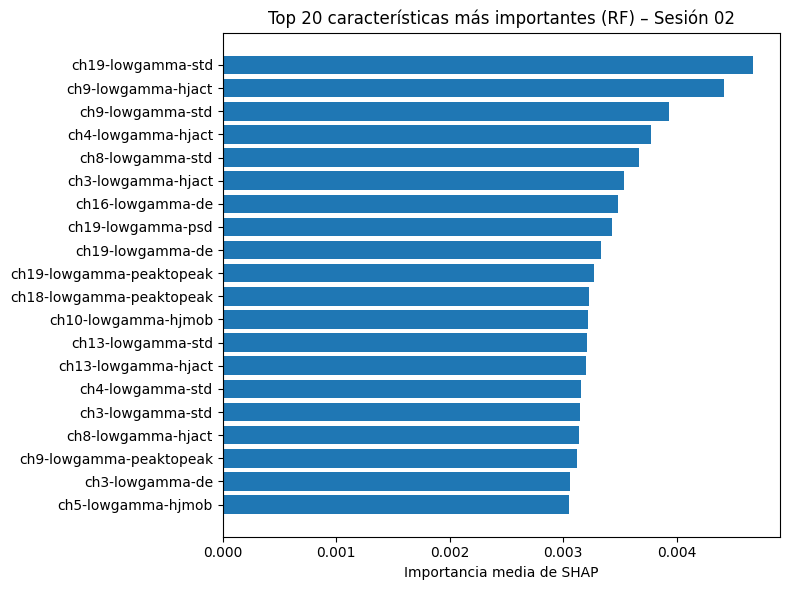

In [72]:
import os
import matplotlib.pyplot as plt

os.makedirs("SHAP_models/Graficas_resultados", exist_ok=True)

plt.figure(figsize=(8, 6))
plt.barh(
    top20_rf["feature"][::-1],
    top20_rf["mean_importance"][::-1]
)
plt.xlabel("Importancia media de SHAP")
plt.title("Top 20 características más importantes (RF) – Sesión 02")
plt.tight_layout()

plt.savefig(
    "SHAP_models/Graficas_resultados/Top20_SHAP_RF_S02.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close()


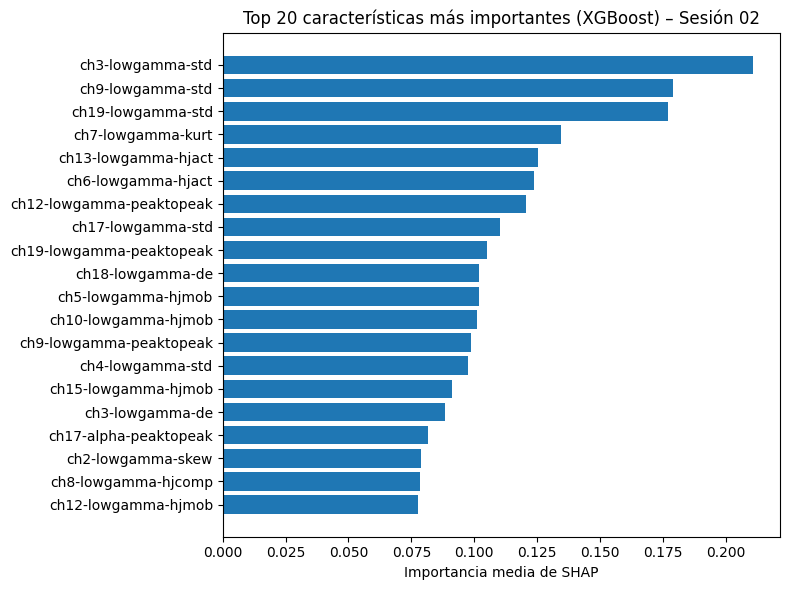

In [73]:
import os
import matplotlib.pyplot as plt

os.makedirs("SHAP_models/Graficas_resultados", exist_ok=True)

plt.figure(figsize=(8, 6))
plt.barh(
    top20_xgb["feature"][::-1],
    top20_xgb["mean_importance"][::-1]
)
plt.xlabel("Importancia media de SHAP")
plt.title("Top 20 características más importantes (XGBoost) – Sesión 02")
plt.tight_layout()

plt.savefig(
    "SHAP_models/Graficas_resultados/Top20_SHAP_XGB_S02.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close()


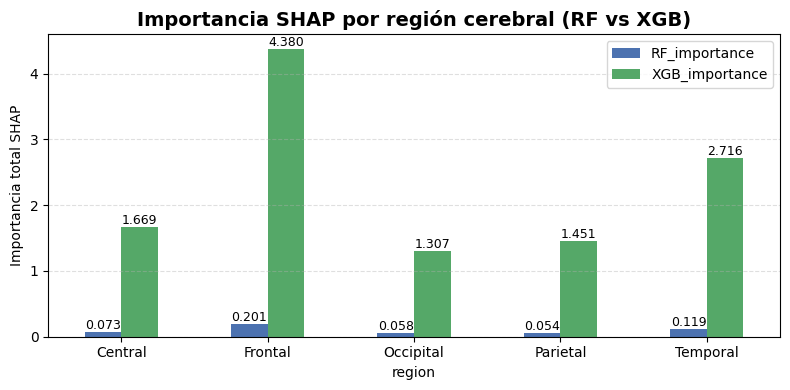

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Cargar CSVs ===
df_rf  = pd.read_csv(csv_rf).rename(columns={"Unnamed: 0": "feature"})
df_xgb = pd.read_csv(csv_xgb).rename(columns={"Unnamed: 0": "feature"})

# === Mapeo canal → región ===
channel_region = {
    "ch1": "Frontal","ch2": "Frontal","ch3": "Frontal","ch4": "Frontal",
    "ch5": "Frontal","ch6": "Frontal","ch7": "Frontal",
    "ch8": "Temporal","ch12": "Temporal","ch13": "Temporal","ch17": "Temporal",
    "ch9": "Central","ch10": "Central","ch11": "Central",
    "ch14": "Parietal","ch15": "Parietal","ch16": "Parietal",
    "ch18": "Occipital","ch19": "Occipital"
}

def get_channel(f):
    return f.split("-")[0]

df_rf["region"]  = df_rf["feature"].apply(get_channel).map(channel_region)
df_xgb["region"] = df_xgb["feature"].apply(get_channel).map(channel_region)

# === Agrupar SHAP por región ===
rf_regions = df_rf.groupby("region")["mean_importance"].sum()
xgb_regions = df_xgb.groupby("region")["mean_importance"].sum()

regions_df = pd.DataFrame({
    "RF_importance": rf_regions,
    "XGB_importance": xgb_regions
})

# === FIGURA ===
colors = ["#4C72B0", "#55A868"]
ax = regions_df.plot(kind="bar", figsize=(8,4), color=colors)

plt.title("Importancia SHAP por región cerebral (RF vs XGB)", fontsize=14, fontweight="bold")
plt.ylabel("Importancia total SHAP")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Etiquetas encima de cada barra
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("SHAP_importance_by_region.png", dpi=300)
plt.show()


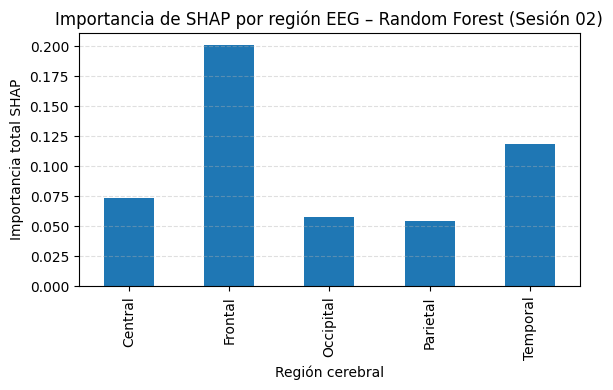

In [75]:
plt.figure(figsize=(6, 4))

rf_regions.plot(
    kind="bar",
    color="tab:blue"
)

plt.title("Importancia de SHAP por región EEG – Random Forest (Sesión 02)")
plt.ylabel("Importancia total SHAP")
plt.xlabel("Región cerebral")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()

plt.savefig(
    "SHAP_models/Graficas_resultados/EEG_regiones_SHAP_RF_SO2.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


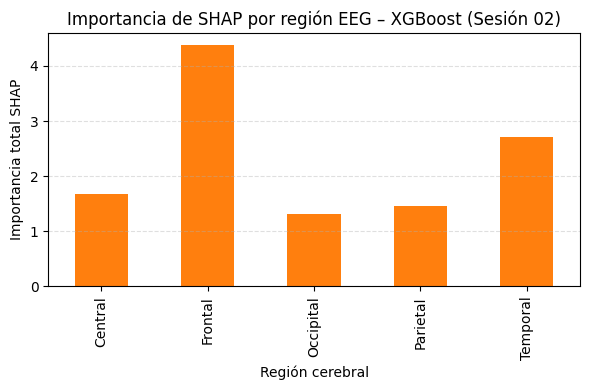

In [76]:
plt.figure(figsize=(6, 4))

xgb_regions.plot(
    kind="bar",
    color="tab:orange"
)

plt.title("Importancia de SHAP por región EEG – XGBoost (Sesión 02)")
plt.ylabel("Importancia total SHAP")
plt.xlabel("Región cerebral")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()

plt.savefig(
    "SHAP_models/Graficas_resultados/EEG_regiones_SHAP_XGB_SO2.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
